# Classifiers
We will test the following classifiers and compare the errors obtained
* The <font color='magenta'>*nearest neighbor classifier*</font>
* The <font color='magenta'>*generative model* </font>
* The <font color='magenta'>*linear regressions*</font>:
<ol>
    <li> Least squares regression</li>
    <li> Ridge regression` </li>
    <li> Lasso Regression </li>
    <li> Logistic Regression </li>
    <li> Perceptron Algorithm </li>
    <li> Support Vector Machine (SVM) </li>
</ol>


## 1. Linear regressions

`regression problem`: Given datasets $(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \cdots,(x^{(n)}, y^{(n)})$ in $\mathbb{R}^n\times\mathbb{R}$, our `goal`is to predict the $y^{(i)}$'s using the $x^{(i)}$. In order to predict the response variable $y^{(i)}$, we are going to fit a line `y = wx+b` of parameters (w, b). w, and b will be choseen in such a way that the error function is minimized.<br>
<img src="./images/illustration.png" width=600>

In [126]:
#from IPython.display import Image
#Image(filename="./images/linear-regression.png", width=400)

In [1]:
## We start by import the modules we will need
%matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Least squares regression 
<img src="./images/linear.png" width=600>

In least square regression the error function or loss functionis given by: 
$$
L(w, b) = \sum_{i=1}^{i=n}(y^{(i)} - (w.x^{(i)} + b))^2
$$
The Loss function can be rewritten :
$$
L(\bar{w}) = \sum_{i=1}^{n}(y^{(i)} - \bar{w}.\bar{x}^{(i)})^2
$$
Where $\bar{w} = (b, w)$ and $\bar{x} = (1, x)$

`Gradient Descent algorithm`

<img src="./images/LMS-algorithm.png" width=600>

<img src="./images/gradDes.png" width=600>

To minimize the loss function we will perform the gradient descent algorithm <br>
The <font color= "blue"> algorithm </font> is the following:
* $w_0 = 0 , t = 0$
* while $\nabla L(w_t) \not\approx 0$:
<ol>
    <li> $w_{t+1} = w_t - \eta_t\nabla L(w_t) $</li>
    <li> t = t + 1</li>
</ol>
 Where $\nabla L (w)$ is the gradient of the Loss function at w and $\eta_t$ the step size at time t.

In [38]:
#Gradient descent for least square regression
def gradient_Descent_LSR(x, y):
    #initialize w
    n, d = x.shape
    w = np.zeros(d+1)
    X = np.zeros((n, d+1))
    X[:, 0] = 1
    X[:, 1:] = np.copy(x)
    b=0
    gradient = -2*np.dot(X.T, y - X.dot(w))
    losses = np.array([])
    eta, alpha = 0.0001, 0.0001
    t=0
    while np.dot(gradient.T, gradient) > eta:
        w = w - alpha*gradient
        gradient = -2*np.dot(X.T, y - X.dot( w))
        losses = np.append(losses, np.sum((y-X.dot(w))**2))
        t = t + 1 
    return w, losses

* `x`: 100-dimensional vector whose coordinates are independent draws from a standard normal (Gaussian) distribution
* `y`: response value given by `y = wx + e` where `w` is a target regression function and `e` is Gaussian noise

We will fix `w` to be the 100-dimensional vector whose first ten coordinates are exactly 1.0, and whose remaining coordinates are zero. Thus only the first ten coordinates of `x` are relevant to the regression task.

In [39]:
def generate_data(n):
    d = 100
    w =np.zeros(d)
    for i in range(10):
        w[i] = 1
    x = np.random.normal(size=(n,d))
    e = np.random.normal(size=n)
    y = x.dot(w) + e
    return x, y
    

In [40]:
x, y = generate_data(200)

In [41]:
x.shape

(200, 100)

In [42]:
w, losses = gradient_Descent_LSR(x,y)

In [47]:
w[1:11]

array([0.72627246, 0.89404771, 0.92335411, 0.91850333, 1.03111655,
       0.95690208, 1.01530468, 0.78137925, 1.05011917, 0.98073059])

In [63]:
w[0]

0.21536389062850383

In [48]:
plt.plot(losses, "r")
plt.xlabel("Iterations")
plt.ylabel("Losses")
plt.show()

In [51]:
np.max(losses)

1813.191387084094

In [52]:
def compute_mean(w, x, y):
    residuals = y - (x.dot(w[1:])+ w[0])
    return (1/x.shape[0])*np.dot(residuals, residuals)

In [61]:
print(f"The mean square error of the least square regression is: {compute_mean(w, x, y):.7∑𝑖=f}")

The mean square error of the least square regression is: 0.4383412


## 1.2 Least square regression using sklearn Linear Model

In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [56]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [62]:
#regr.coef_
regr.intercept_

0.21535910745699424

In [58]:
regr.predict(x).shape

(200,)

In [60]:
error = mean_squared_error(regr.predict(x), y)
print(f"The mean error from sklearn linear model is:{error:.7f}")

The mean error from sklearn linear model is:0.4383412


## 1.3 Ridge Rigression
<img src="./images/ridgeFormula.jpg" width=600>

In Ridge regression the loss function is given by: 
$$
L(w, b) = \sum_{i=1}^{n}(y^{(i)} - (w.x^{(i)} + b))^2 + \lambda\|w\|_2^{2}
$$

$$\frac{\partial L}{\partial b}(w, b) = -2\sum_{i=1}^{n} y^{(i)} - (w.x^{(i)}+b)$$

$$\frac{\partial L}{\partial w_j}(w, b) = -2\sum_{i=1}^{n} y^{(i)} - (w_j.x_j^{(i)}+b) + 2\lambda w_j$$

The gradient of L is given by:
$$ \nabla L(w, b) = \left(-2\sum_{i=1}^{n} y^{(i)} - (w.x^{(i)}+b), -2\sum_{i=1}^{n} y^{(i)} - (w_j.x_j^{(i)}+b) + 2\lambda w_j\right) $$

It's and (d+1)-dimensional vector.

In [79]:
def gradient_descent_Ridge(x, y, C):
    # Initialize w and b to 0
    w = np.zeros(x.shape[1])
    b = 0
    partial = np.zeros(x.shape[1] + 1)
    partial[0] = -2*np.sum(y-(x.dot(w)+b)) # this is the partial derivative wrt b is a number
    partial[1:] = -2*(np.dot(x.T, y-(x.dot(w)+b)) - C*w) # partial derivative wrt w is d-vector
    losses = np.array([])
    while np.sqrt(np.dot(partial.T, partial)) >= 0.001:
        partial[0] = -2*np.sum(y-(x.dot(w)+b))
        partial[1:] = -2*(np.dot(x.T, y-(x.dot(w)+b)) - C*w)
        b = b - 0.00001*partial[0]
        w = w - 0.00001*partial[1:]
        losses = np.append(losses, (1/x.shape[0])*np.sum((y-(x.dot(w)+b))**2))
    return w, b ,losses

In [80]:
x, y = generate_data(200)

In [81]:
C = 10.
w ,b, Losses = gradient_descent_Ridge(x, y, C)

In [82]:
w

array([ 1.00421063e+00,  1.03270050e+00,  9.39639067e-01,  8.79313115e-01,
        1.00401168e+00,  8.38234285e-01,  1.01137022e+00,  9.80999546e-01,
        8.83693944e-01,  9.57311156e-01, -1.80738848e-01, -2.68756806e-01,
        5.28995427e-02,  1.29467973e-01, -1.57936952e-01,  1.01231324e-01,
        1.38643198e-01,  9.68158697e-02, -9.15468463e-02,  6.07479932e-02,
       -7.94405059e-02, -7.50095574e-02, -6.24519161e-02, -6.38602643e-02,
       -7.66696954e-02, -1.49970171e-01,  1.42643614e-03,  4.59237788e-02,
       -2.92010759e-02, -1.25765627e-01, -7.72526279e-02, -9.97150941e-03,
        1.16104292e-01,  6.74258569e-02,  1.20173275e-01, -7.55080561e-03,
        9.09193621e-04,  3.62889519e-02,  1.38232351e-01, -4.98178140e-02,
        6.32305486e-02, -6.11234176e-03,  9.60140152e-02,  3.80914174e-02,
       -1.03898853e-02,  7.01425958e-02,  3.03898085e-02, -6.79932322e-02,
       -2.82369712e-02,  5.21355025e-02, -9.14614744e-02, -1.19237587e-03,
       -3.57060015e-02, -

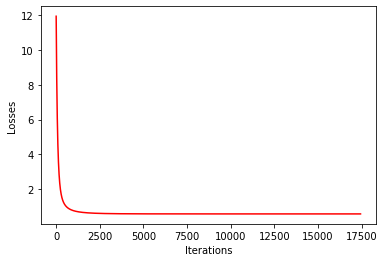

In [83]:
plt.plot(Losses, "r")
plt.xlabel("Iterations")
plt.ylabel("Losses")
plt.show()

In [84]:
def compute_mse(w,b,x,y):
    residuals = y - (np.dot(x, w) + b)
    return np.dot(residuals, residuals)/(x.shape[0])

In [85]:
mean_error = compute_mse(w,b, x, y)
print(f"The mean error is: {mean_error:.4f}")

The mean error is: 0.5733


## 1.4 Ridge Rigression using sklearn

In [91]:
rg = linear_model.Ridge(alpha=C)
rg.fit(x,y)
err = mean_squared_error(rg.predict(x), y)
print(f"The error is : {err:.4f}")

The error is : 0.5733


## 1.5 Logistic Rigression (Linear model for conditional probability estimation)
`idea`: Given a data set of pairs (x, y), where $x\in\mathbb{R}^d$, and $y\in\{-1, 1\}$. We want to construct a classifier that also gives probability `Pr(y = 1 | x)`. <br>
$y\in\mathbb{R}^d$, $w_1.x_1 + w_2.x_2 +\cdots + w_d.x_d + b = w.x + b$, where $w = (w_1,\dots, w_d)$<br>
The `probability` of y = 1
* Increases as the linear function grows
* Is 50% when this linear function is zero

How can we convert `w.x + b` into a probability ?

The `squashing function` 
$$
s(z) = \frac{1}{1+e^{-z}}\in [0, 1]
$$

<img src="./images/logistic_lienar.png" width=600>

$$Pr_{w,b}(y | x) = \frac{1}{e^{-y(w.x+b)}}$$

#### The learning problem: `Maximum-Likelihood principle.`
Given data $\qquad (x^{(1)}, y^{(1)}), \dots, (x^{(n)}, y^{(n)}) \in\mathbb{R}^d\times\{-1, 1\}$ <br>
Pick $w\in\mathbb{R}^d$ and $b\in\mathbb{R}$ that maximize:
$$
\prod_{i=1}^nPr_{w, b}(y^{(i)}|x^{(i)})
$$
Take the log to get loss function

$$
L(w, b) = -\sum_{i=1}^{n}\log Pr_{w, b}(y^{(i)}|x^{(i)}) = \sum_{i=1}^{n}\log (1 + e^{-y^{(i)}(w.x^{(i)}+b)})
$$

`Goal`: Minimize L(w, b)<br>
L(w, b) is a `convex` function. We can minimize L(w, b) by local search (Gradient descent)

$$ \frac{\partial L}{\partial w_j}(w) = -\sum_{i=1}^{n} Pr_{w}(-y^{(i)}|x^{(i)})y^{(i)}x^{(i)}_j $$

for $j =1, \dots, d$

### `Gradient descent for logistic regression`

* set $w_0=0$
* for $t=0, 1, 2, \dots$ until convergence:<br>
$w_{t+1} = w_{t} + \eta_{t}\sum_{i=1}^{n}y^{(i)}x^{(i)}Pr_{w_{t}}(-y^{(i)}|x^{(i)})$

In [92]:
## Gradient descent for logistic regression
def gradient_LR(x, y):
    n, d = x.shape
    w = np.zeros(d+1)
    X = np.zeros((n, d+1))
    X[:, 0] = 1
    X[:,1:] = np.copy(x)
    q = np.exp(np.multiply(y, X.dot(w)))
    p = 1/(1 + q)
    partial = -np.dot(X.T, np.multiply(y, p)) #this is the gradient of loss function at w
    # Main loop
    eta = 0.001
    while np.dot(partial.T, partial) > 0.001:
        w = w - eta*partial
        q = np.exp(np.multiply(y, X.dot(w)))
        p = 1/(1 + q)
        partial = -np.dot(X.T, np.multiply(y, p))
        
    b = w[0]
    w = w[1:]
    return w, b

### `Stochastic gradient descent for logistic regression`

`Update` based on just one point.
* Get next data point (x, y) by cycling throught the data set
* $w_{t+1} = w_{t} + \eta_{t} y x Pr_{w_t}(-y|x)$

### `decomposable loss functions`
$$
L(w) = \sum_{i=1}^{n}\log (1+e^{-y^{(i)}(w.x^{(i)})}) = \sum_{i=1}^{n}(\text{ loss of w on } (x^{(i)}, y^{(i)}))
$$<br>
For training set $(x^{(1)}, y^{(1)}), \dots (x^{(n)}, y^{(n)})$
$$
L(w) = \sum_{i=1}^{n}\ell(w; x^{(i)}, y^{(i)})
$$
Where $\ell(w; x, y)$ captures the `loss` on a single point.<br>
For minimizing :
$$
L(w) = \sum_{i=1}^{n}\ell(w; x^{(i)}, y^{(i)})
$$

$$
\nabla L (w) = \sum_{i=1}^n\nabla\ell(w; x^{(i)}, y^{(i)})
$$

`Gradient descent`
* $w_0=0$
* While not converged: $w_{t+1} = w_t -\eta_{t}\sum_{i=1}^{n}\ell(w_t; x^{(i)}, y^{(i)})$

`Stochastic gradient descent`
* $w_0=0$
* Keep cycling through data point (x, y)<br>
$w_{t+1} = w_{t} - \eta_{t}\nabla\ell(w_{t}; x, y)$

`Mini-batch stochastic gradient descent`
* $w_0=0$
* Repeat until convergence:
<ol>
    <li> Get the next batch of point B</li>
    <li> $w_{t+1} = w_{t} -\eta_{t}\sum_{(x,y)\in B}\nabla\ell(w_{t}; x, y)$</li>
</ol>

## Case study Iris dataset

The Iris flower data set or `Fisher's` Iris data set is a multivariate data set introduced by the British statistician and biologist `Ronald Fisher` in his `1936` paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called `Anderson's Iris` data set because `Edgar Anderson` collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the `Gaspé Peninsula` "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".<br>

The data set consists of `50 samples` from each of three species of Iris (`Iris setosa`, `Iris virginica` and `Iris versicolor`). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a `linear discriminant model` to distinguish the species from each other.

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [95]:
iris = datasets.load_iris()

In [96]:
x = iris.data
y = iris.target

In [99]:
np.unique(y)

array([0, 1, 2])

In [100]:
Y = y[y!= 2] #Getting only two labels drop label 2

In [101]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([50, 50]))

In [102]:
Y.shape

(100,)

In [103]:
X = x[y!=2, :] #Drop the rows for label 2

In [104]:
X.shape

(100, 4)

In [105]:
## Next we will relabel the label 0 to -1
for i in range(len(Y)):
    if Y[i] == 0:
        Y[i] = -1

In [106]:
np.unique(Y, return_counts=True)

(array([-1,  1]), array([50, 50]))

In [107]:
## deviding data to training testing sets
def data_separation(x, y):
    n = x.shape[0]
    perm = np.random.permutation(n)
    nn = int(0.8*n)
    ind_train = perm[:nn]
    ind_test = perm[nn:]
    x_train = x[ind_train, :]
    y_train = y[ind_train]
    x_test = x[ind_test, :]
    y_test = y[ind_test]
    return x_train, y_train, x_test, y_test

In [108]:
x_train, y_train, x_test, y_test = data_separation(X, Y)

In [109]:
x_train.shape

(80, 4)

In [110]:
np.unique(y_train, return_counts=True)

(array([-1,  1]), array([36, 44]))

In [111]:
np.unique(y_test, return_counts=True)

(array([-1,  1]), array([14,  6]))

### `Gradient descent for logistic regression in Iris dataset`

In [112]:
## return the parameters of the line that separate the two classes
w, b = gradient_LR(x_train, y_train)

In [113]:
w

array([-0.98093578, -3.38710611,  5.34102738,  2.50193723])

In [114]:
b

-0.620286573834876

### `Now that we have w and b, how to classify new point?`
the line `w.x + b = 0` is the line that separate each classe. If $x^{(i)}$ is a new data point, to classify $x^{(i)}$, we compute $w.x^{(i)} + b$, if :
* $w.x^{(i)}+b\geq 0$ we classify x in `label 1`
* $w.x^{(i)}+b<0$ we clasify x in `label -1` 

In [115]:
def y_pred(x, w, b):
    n = x.shape[0]
    pred = np.zeros(n)
    for i in range(n):
        if np.dot(x[i].T, w)+b >= 0:
            pred[i] = 1
        else:
            pred[i] = -1
    return pred

In [116]:
pred = y_pred(x_train, w, b)

In [117]:
np.sum(pred!=y_train)

0

In [118]:
pred_test = y_pred(x_test, w, b)

In [119]:
np.sum(pred_test != y_test)

0

In [120]:
pred_test

array([-1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1.])

### Margin on test point

Margin on test point $x = |Pr_{w,r}(y=1|x) -1/2|$

### `Probability Prediction`

In [121]:
def proba_predict(x,y):
    p = 1/(1+np.exp(np.multiply(-y, x.dot(w)+b)))
    return p

In [122]:
prob = proba_predict(x_train, y_train)

In [123]:
prob

array([0.99860212, 0.99886816, 0.99994065, 0.99919245, 0.9997798 ,
       0.99999478, 0.99998162, 0.9998603 , 0.99975923, 0.9999988 ,
       0.99999983, 0.99990389, 0.99993562, 0.99953134, 0.99856346,
       0.99998609, 0.99977989, 0.99999957, 0.99992164, 0.9999048 ,
       0.99995168, 0.99996027, 0.99992501, 0.99988427, 0.99958999,
       0.99934684, 0.99999076, 0.99992173, 0.99970234, 0.99792856,
       0.9999877 , 0.99412364, 0.99990955, 0.99999407, 0.99999445,
       0.99999155, 0.99999749, 0.99999178, 0.99993837, 0.99950495,
       0.99998971, 0.99992259, 0.99988222, 0.99998581, 0.9979678 ,
       0.99845285, 0.99997982, 0.99995025, 0.99084619, 0.99869501,
       0.99986313, 0.99983749, 0.99986411, 0.99980243, 0.99993336,
       0.99982088, 0.99957477, 0.99999574, 0.99992516, 0.99997035,
       0.99990392, 0.99994947, 0.99999   , 0.99999396, 0.99996569,
       0.99910999, 0.99952608, 0.99980233, 0.99966247, 0.99999486,
       0.99998945, 0.99998531, 0.99995531, 0.99999762, 0.99987

## 1.6 Using SKlearn Logistic Regression

We could implement our own logistic regression solver using stochastic gradient descent, but fortunately, there is already one built into `scikit-learn`.

Due to the randomness in the SGD procedure, different runs can yield slightly different solutions (and thus different error values).

`SGD` Stochastic Gradient Descent

In [125]:
from sklearn.linear_model import SGDClassifier

# Fit logistic classifier on the training datas
clf = SGDClassifier(loss="log", penalty="none") #log for logistic regression
clf.fit(x_train, y_train)
## Pull out the parameters (w,b) of the logistic regression model
w =clf.coef_
b = clf.intercept_
## Get prediction on training and testing data
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)
##Compute error
train_error = np.sum(pred_train != y_train)
test_error = np.sum(pred_test != y_test)

print(train_error, test_error)
print("Training error is", float(train_error)/len(y_train))
print("Testing error is", float(test_error)/len(y_test))

0 0
Training error is 0.0
Testing error is 0.0


In [127]:
clf.predict_proba(x_test).shape

(20, 2)

In [130]:
clf.predict_proba(x_train)[:,1]

array([1.00000000e+00, 1.61207633e-12, 1.25108967e-28, 1.00613434e-15,
       1.08861728e-23, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       3.69892222e-24, 1.00000000e+00, 1.00000000e+00, 1.09157084e-25,
       1.00000000e+00, 4.78163560e-17, 1.00000000e+00, 1.13740658e-35,
       4.40127998e-19, 1.00000000e+00, 2.71315211e-27, 5.49659759e-25,
       6.55937710e-28, 1.00000000e+00, 1.00000000e+00, 7.66721730e-24,
       1.20067268e-18, 2.83017936e-15, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.04180009e-04,
       1.00000000e+00, 1.00000000e+00, 1.75121970e-39, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 7.66320352e-17,
       7.13510310e-42, 1.00000000e+00, 6.37831082e-23, 1.00000000e+00,
       4.37539317e-09, 2.41939691e-09, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.85170331e-10, 1.00000000e+00, 5.82392077e-23,
       1.00000000e+00, 8.12380118e-22, 1.00000000e+00, 8.28944316e-22,
      

### `Analyzing the margin`

The logistic regression model produces not just classifications but also conditional probability estimates. 

We will say that `x` has **margin** `gamma` if (according to the logistic regression model) `Pr(y=1|x) > (1/2)+gamma` or `Pr(y=1|x) < (1/2)-gamma`. The following function **margin_counts** takes as input the classifier (`clf`, computed earlier), the test set (`test_data`), and a value of `gamma`, and computes how many points in the test set have margin at least `gamma`.

In [131]:
## Return number of test points for which Pr(y=1) lies in [0, 0.5 - gamma) or (0.5 + gamma, 1]
def margin_counts(clf, test_data, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1]
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    return float(len(margin_inds))

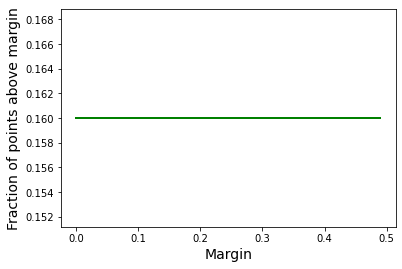

In [133]:
gammas = np.arange(0,0.5,0.01)
f = np.vectorize(lambda g: margin_counts(clf, x_train, g))
plt.plot(gammas, f(gammas)/500.0, linewidth=2, color='green')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Fraction of points above margin', fontsize=14)
plt.show()

## 1.7 Binary classification: Perceptron algorithm

`data` $x\in\mathbb{R}^d$ and labels $y\in\{-1, 1\}$ 

**<font color="magenta">Linear classifier</font>**
* parameters: $w\in\mathbb{R}^d$ and $b\in\mathbb{R}$
* Decision boundary `w.x + b = 0`
* On point x, presict label `sign(w.x + b)`

If the true label point x is y:
* Classify correct if `y(w.x + b) > 0`
y has the same signe as **w.x + b**

### `The loss function`

What is the loss of our linear clasifier (given by w, b) on a point (x, y)?
One **idea** for a loss function is:
* If `y(w.x + b) > 0`: correct no loss
* if `y(w.x + b) > 0`: then `loss =-y(w.x + b)` amount by which we are wrong 

### `Perceptron algorithm`

* Initial `w = 0 and b = 0`
* Keep cycling through the training data (x, y):<br>
if `y(w.x + b) <= 0` (i.e point misclassified)
<ul>
    <li> w = w + yx</li>
    <li> b = b + y </li>
</ul>

### `Perceptron at work`

This first procedure, **evaluate_classifier**, takes as input the parameters of a linear classifier (`w,b`) as well as a data point (`x`) and returns the prediction of that classifier at `x`.

In [26]:
def evaluate_classifier(w, b, x):
    if x.dot(w) + b > 0:
        return 1
    else:
        return -1
    return 0

Here is the Perceptron training procedure. It is invoked as follows:
* `w,b,converged = train_perceptron(x,y,n_iters)`

where
* `x`: n-by-d numpy array with n data points, each d-dimensional
* `y`: n-dimensional numpy array with the labels (each 1 or -1)
* `n_iters`: the training procedure will run through the data at most this many times (default: 100)
* `w,b`: parameters for the final linear classifier
* `converged`: flag (True/False) indicating whether the algorithm converged within the prescribed number of iterations

If the data is not linearly separable, then the training procedure will not converge.

In [27]:
def train_perceptron(x, y, n_iters=100):
    n,d = x.shape
    w = np.zeros(d)
    b = 0
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            if (evaluate_classifier(w,b,x[j,:]) != y[j]):
                w = w + y[j] * x[j,:]
                b = b + y[j]
                done = False
        iters = iters + 1
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print("Perceptron algorithm: iterations until convergence: ", iters)
    else:
        print("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged

In [50]:
def run_perceptron(x, y, w, b, converged):
    n,d = x.shape
    # Run the Perceptron algorithm for at most 100 iterations
    #w,b,converged = train_perceptron(x,y,100)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        Z = np.array([evaluate_classifier(w,b,pt) for pt in grid])
        # Show the classifier's boundary using a color plot
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    plt.show()

In [37]:
from sklearn import datasets

In [38]:
iris = datasets.load_iris()

In [39]:
x =iris.data
y = iris.target

In [40]:
x.shape

(150, 4)

In [41]:
X = x[:, [0,1]]

In [42]:
Y = y[y!=2]

In [ ]:
import numpy as np
np.unique(y)

In [44]:
for i in range(len(Y)):
    if Y[i] == 0:
        Y[i] = -1

In [45]:
np.unique(Y)

array([-1,  1])

In [46]:
X = X[y!=2, :]

In [49]:
w, b, converged = train_perceptron(X, Y, 500)

Perceptron algorithm: iterations until convergence:  443


In [52]:
import matplotlib.pyplot as plt
run_perceptron(X, Y, w, b, converged)

## 1.7 Support Vector Machines (SVM)

SVM is an extension of the perceptron. Here our optimization objective is to maximize the `margin` which is the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperrplane, which are the so-called `support vectors`. 

### `Maximum margin intuition`

The rationale behind having decidion boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.

$$
\begin{cases}
    w_{0} + w^{T}x_{\text{positive}} &= 1 \\
    w_{0} + w^{T}x_{\text{negative}} &= -1
\end{cases}
$$

This implies that $w^{T}(x_{\text{positive}}-x_{\text{negative}}) = 2$ <br>
Normalizing by $\|w\|$, we obtain:
$$
\frac{w^{T}(x_{\text{positive}}-x_{\text{negative}})}{\|w\|} = \frac{2}{\|w\|}
$$

Which define the `margin`

`Goal`: maximization of this margin by minimizing $2/\|w\|$ under the contraint that the samples are classified correctly.

$$
w_0 + w^Tx^{(i)}\geq 1 \quad\text{if }y^{(i)}=1\\
w_0 + w^Tx^{(i)} < -1 \quad\text{if }y^{(i)}=-1
$$

meaning `negative` samples should fall on one side of the `negative hyperplane`, whereas `positive` should fall behind the `positive hyperplane` <br>
$$
y^{(i)}(w_0 + w^Tx^{(i)})\geq 1 \quad \forall i
$$

`In short`: we want:
$$
\begin{cases}
    \min_{w\in\mathbb{R},b\in\mathbb{R}}\|w\|^2 \\
    y^{(i)}(w_0 + w^Tx^{(i)})\geq 1 \quad \forall i = 1, 2, \dots, n
\end{cases}
$$

This is a `convex optimazition`problem:
* Convex objective function
* linear contraints

This means that :
* The `optimal solution` can be found efficiently
* `duality` gives us information about the solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline